<a href="https://colab.research.google.com/github/nethaponduru/digitrecognizer/blob/main/digitrecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from PIL import Image
import scipy

In [8]:
train_data = pd.read_csv('train.csv')
train = train_data.values
x_train_orig = train[:,1:]
y_train_orig = train[:,0]
y_train = tf.one_hot(y_train_orig,depth=10)
x_train = x_train_orig/255.0
test_data = pd.read_csv('test.csv')
x_test_orig = test_data.values
x_test = x_test_orig/255.0
train_data = pd.read_csv('train.csv')
train = train_data.values
x_train_orig = train[:,1:]
y_train_orig = train[:,0]
y_train = tf.one_hot(y_train_orig,depth=10)
x_train = x_train_orig/255.0
test_data = pd.read_csv('test.csv')
x_test_orig = test_data.values
x_test = x_test_orig/255.0

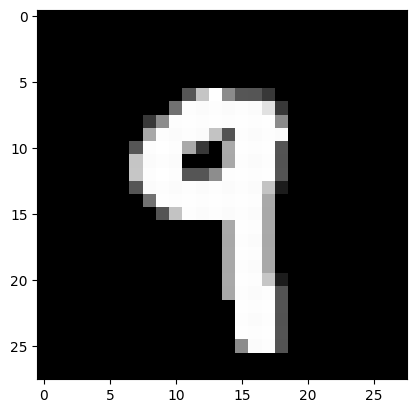

In [9]:
index = 18
img = np.reshape(x_test_orig[index],(28,28))
plt.imshow(img, cmap='gray')
plt.show()

In [10]:
y_train = tf.cast(y_train,dtype=tf.int64)
print(y_train[15])

tf.Tensor([0 1 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


In [11]:
import tensorflow.keras.layers as tfl

In [12]:
model = tf.keras.Sequential()
model.add(tfl.Input(shape=(784,)))
model.add(tfl.Dense(256,activation='relu'))
model.add(tfl.Dense(84,activation='relu'))
model.add(tfl.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 84)                21588     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                                 
Total params: 223,398
Trainable params: 223,398
Non-trainable params: 0
_________________________________________________________________


In [14]:
print(train.shape)
print("x_train shape: "+str(x_train.shape)) # this shows 40k test cases
print("y_train shape: "+str(y_train.shape))
# print("x_cv shape: "+str(x_cv.shape))
# print("y_cv shape: "+str(y_cv.shape))
print("x_test shape: "+str(x_test.shape)) # this shows 28K test cases

(42000, 785)
x_train shape: (42000, 784)
y_train shape: (42000, 10)
x_test shape: (28000, 784)


In [15]:
model.fit(x_train, y_train, epochs=15, batch_size=16)

Epoch 1/15
2625/2625 [==============================] - 9s 3ms/step - loss: 0.0448 - accuracy: 0.9304
Epoch 2/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0176 - accuracy: 0.9724
Epoch 3/15
2625/2625 [==============================] - 7s 3ms/step - loss: 0.0123 - accuracy: 0.9810
Epoch 4/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0087 - accuracy: 0.9866
Epoch 5/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0067 - accuracy: 0.9901
Epoch 6/15
2625/2625 [==============================] - 7s 3ms/step - loss: 0.0050 - accuracy: 0.9928
Epoch 7/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0039 - accuracy: 0.9946
Epoch 8/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.0037 - accuracy: 0.9945
Epoch 9/15
2625/2625 [==============================] - 7s 3ms/step - loss: 0.0034 - accuracy: 0.9953
Epoch 10/15
2625/2625 [==============================] - 8s 3ms/step - loss: 0.002

In [16]:
y_pred_softmax = model.predict(x_test)
print(y_pred_softmax.shape)

875/875 [==============================] - 1s 1ms/step
(28000, 10)


In [17]:
y_pred = tf.argmax(y_pred_softmax,axis=1)


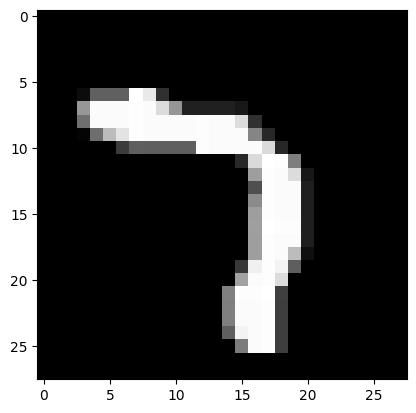

tf.Tensor(7, shape=(), dtype=int64)


In [18]:
index = 45
img = np.reshape(x_test_orig[index],(28,28))
plt.imshow(img, cmap='gray')
plt.show()
print(y_pred[index])

In [19]:
y_test = y_pred.numpy()
output = pd.DataFrame(y_test)
output.to_csv('epoch15.csv',index=False)

In [20]:
model.evaluate(x_train,y_train)

1313/1313 [==============================] - 2s 2ms/step - loss: 0.0026 - accuracy: 0.9972


[0.0026213994715362787, 0.9972380995750427]

In [21]:
mnist_data = pd.read_csv('/content/sample_data/mnist_test.csv')
test = mnist_data.values
x_mnist_orig = test[:,1:]
x_mnist = x_mnist_orig/255.0
y_mnist_orig = test[:,0]
y_mnist = tf.one_hot(y_mnist_orig,depth=10)

In [22]:
model.evaluate(x_mnist,y_mnist)

313/313 [==============================] - 1s 2ms/step - loss: 0.0123 - accuracy: 0.9885


[0.012293148785829544, 0.988498866558075]

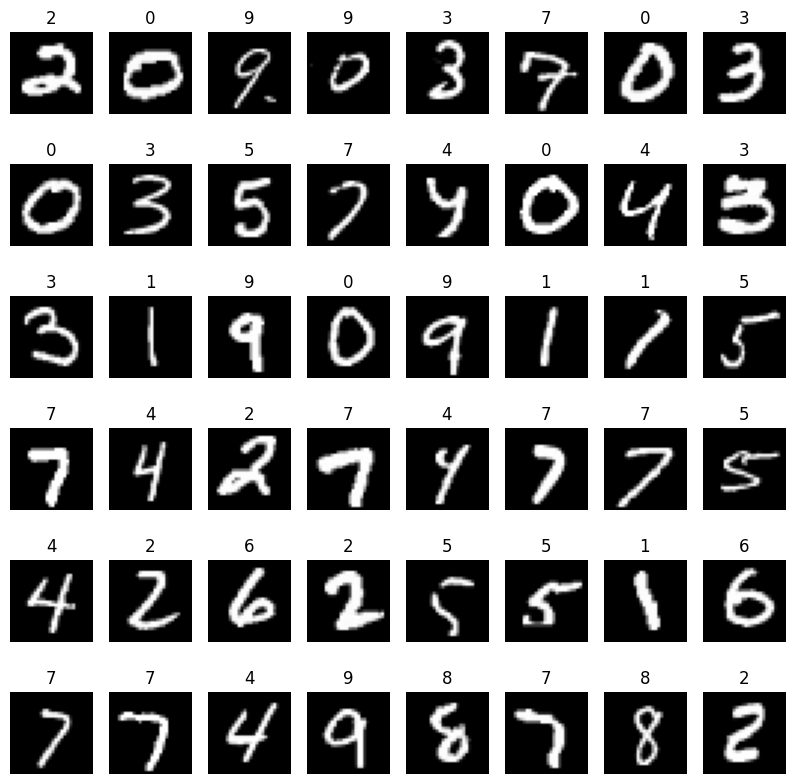

In [23]:
images_iter = iter(x_test)
labels_iter = iter(y_pred)
plt.figure(figsize=(10, 10))
for i in range(48):
    ax = plt.subplot(6, 8, i + 1)
    img = np.reshape(x_test_orig[i],(28,28)) #reshaping the image to (28,28)
    plt.imshow(img, cmap='gray')
    plt.title(int(y_pred[i]))
    plt.axis("off")